In [3]:
#Importing required libraries

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge

from sklearn.kernel_ridge import KernelRidge


#from yellowbrick.regressor import ResidualsPlot
#from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.multioutput import MultiOutputRegressor

In [6]:
df=pd.read_excel("database_new.xlsx")

In [7]:
df.shape

(18526, 36)

In [8]:
df.head()

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,mie_epsilon,length_scale_factor,...,q_sca,g,c_geo,c_ext,c_abs,c_sca,ssa,mac_total,mac_bc,mac_organics
0,660,1.5,0,15.0,1.0,15.000000,15.000000,23.829600,2,0.0952,...,0.000389,0.003798,706.858347,0.000083,0.000083,2.750739e-07,0.003318,3.897000,3.897000,na
1,660,1.5,0,15.0,2.0,18.898816,18.898816,33.934547,2,0.0952,...,0.001005,0.008979,1122.067684,0.000173,0.000172,1.128127e-06,0.006529,4.047873,4.047873,na
2,660,1.5,0,15.0,3.0,21.633744,21.633744,41.730020,2,0.0952,...,0.001755,0.016226,1470.324613,0.000270,0.000267,2.579832e-06,0.009558,4.202000,4.202000,na
3,660,1.5,0,15.0,4.0,23.811016,23.811016,48.324498,2,0.0952,...,0.002516,0.022854,1781.171422,0.000362,0.000357,4.481784e-06,0.012386,4.212966,4.212966,na
4,660,1.5,0,15.0,5.0,25.649639,25.649639,54.149126,2,0.0952,...,0.003323,0.029703,2066.866345,0.000454,0.000447,6.867783e-06,0.015117,4.220137,4.220137,na


# Support Vector Regression

In [58]:
def generate_default_model(X,y):
    array_var=[]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.25, 
        random_state=42)

    scaling=StandardScaler()
    X_train=scaling.fit_transform(X_train)
    X_test=scaling.transform(X_test)

    regressor=SVR()
    model=regressor.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    mean_squ_err=mean_squared_error(y_test,y_pred)
    #print(mean_squ_err)
    array_var.extend([model, X_train, y_train, X_test, y_test])
    return array_var


In [59]:
def grid_search_cv(parameters, model, X_train, y_train):
    grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1
                        )
    grid_search= grid_search.fit(X_train, y_train)
    print('Best score in CV: ', grid_search.best_score_)
    print('Best parameters in CV: ', grid_search.best_params_)
    return grid_search

In [60]:
def predict_and_mse(parameter_c, parameter_epsilon, X_train, y_train, X_test, y_test):
    regressor=SVR(C= parameter_c, epsilon= parameter_epsilon)
    model=regressor.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    mse=mean_squared_error(y_test,y_pred)
    return mse

In [ ]:
parameters=[{
    'C':[1, 10,50, 60],
    #'kernel': ['linear', 'rbf'],
    #'degree':[1,2,3,4],
    'epsilon':[0.0001, 0.001, 0.01, 0.1]
}]


# Individual optical properties

In [11]:
#q_ext

In [46]:
y = df['q_ext']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

0.0028797229979796823
-0.00038501667815159636
{'C': 60, 'epsilon': 0.001}


AttributeError: 'GridSearchCV' object has no attribute 'grid_search'

In [47]:
parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print(mse)

0.00024293113056907288


In [50]:
#q_abs

In [62]:
y = df['q_abs']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

Best score in CV:  -0.00045258168887665865
Best parameters in CV:  {'C': 60, 'epsilon': 0.0001}
Mean squared error on test set:  0.000240805628128904


In [63]:
#q_sca

In [64]:
y = df['q_sca']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

Best score in CV:  -7.290039439079095e-05
Best parameters in CV:  {'C': 60, 'epsilon': 0.0001}
Mean squared error on test set:  5.51085581044487e-05


In [65]:
#g

In [66]:
y = df['g']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

Best score in CV:  -0.0004465976589784824
Best parameters in CV:  {'C': 60, 'epsilon': 0.01}
Mean squared error on test set:  0.0004265715486122869


In [67]:
#c_geo

In [87]:
y = df['c_geo']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

Best score in CV:  -85844196.69437674
Best parameters in CV:  {'C': 1000, 'epsilon': 1}
Mean squared error on test set:  78254187.34143032


In [69]:
#c_ext

In [70]:
y = df['c_ext']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

Best score in CV:  -7.631231954479751e-07
Best parameters in CV:  {'C': 60, 'epsilon': 0.0001}
Mean squared error on test set:  3.1105865529319905e-07


In [71]:
#c_abs

In [72]:
y = df['c_abs']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

Best score in CV:  -7.816417908350606e-07
Best parameters in CV:  {'C': 60, 'epsilon': 0.0001}
Mean squared error on test set:  2.519596667699151e-07


In [73]:
#c_sca

In [74]:
y = df['c_sca']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

Best score in CV:  -4.4108284992367343e-07
Best parameters in CV:  {'C': 60, 'epsilon': 0.0001}
Mean squared error on test set:  1.8305288979836883e-07


In [75]:
#ssa

In [76]:
y = df['ssa']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

Best score in CV:  -3.424170239222977e-05
Best parameters in CV:  {'C': 60, 'epsilon': 0.001}
Mean squared error on test set:  2.432401466845546e-05


In [77]:
#mac_total

In [78]:
y = df['mac_total']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

Best score in CV:  -0.01942989155122721
Best parameters in CV:  {'C': 60, 'epsilon': 0.01}
Mean squared error on test set:  0.018726224410628423


In [79]:
#mac_bc

In [80]:
y = df['mac_bc']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

Best score in CV:  -0.01998278683748254
Best parameters in CV:  {'C': 60, 'epsilon': 0.01}
Mean squared error on test set:  0.019240095858609897


In [81]:
#mac_organics

In [85]:
parameters=[{
    'C':[ 500, 1000],
    #'kernel': ['linear', 'rbf'],
    #'degree':[1,2,3,4],
    'epsilon':[0.8, 1]
}]

In [86]:
y = df['mac_organics']
X = df.iloc[:,:8]

array_var=generate_default_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_c=grid_search.best_params_['C']
parameter_epsilon=grid_search.best_params_['epsilon']

mse=predict_and_mse(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

Best score in CV:  -4897.0682883284
Best parameters in CV:  {'C': 1000, 'epsilon': 1}
Mean squared error on test set:  5133.9256000795385


In [42]:
#Predicting for 3 variables (q_abs, q_sca, g) using multioutputregressor

# Leaving random part of dataset out

In [44]:
parameters=[{
    'estimator__C':[1, 10,50, 60],
    #'kernel': ['linear', 'rbf'],
    #'degree':[1,2,3,4],
    'estimator__epsilon':[0.0001, 0.001, 0.01, 0.1]
}]


In [45]:
def generate_default_kernel_SVR(X,Y):
    array_var=[]
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, 
        test_size=0.25, 
        random_state=42)

    scaling_x=StandardScaler()
    scaling_y=StandardScaler()
    X_train=scaling_x.fit_transform(X_train)
    X_test=scaling_x.transform(X_test)
    Y_train=scaling_y.fit_transform(Y_train)
    #Y_test=scaling_y.transform(Y_test)

    regressor= SVR()
    #model=regressor.fit(X_train,Y_train)
    #print(model.get_params())

    array_var.extend([regressor, X_train, Y_train, X_test, Y_test, scaling_y])
    return array_var


In [46]:
def grid_search_cv(parameters, model, X_train, Y_train):
    grid_search=GridSearchCV(estimator=MultiOutputRegressor(model),
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1
                        )
    grid_search= grid_search.fit(X_train, Y_train)
    print('Best score in CV: ', grid_search.best_score_)
    print('Best parameters in CV: ', grid_search.best_params_)
    return grid_search

In [47]:
def calculate_mean_absolute_percentage_error_multi(parameter_c, parameter_epsilon, X_train, Y_train, X_test, Y_test, scaling_y):
    
    regressor=SVR(C= parameter_c, epsilon= parameter_epsilon)
    
    wrapper=MultiOutputRegressor(regressor)
    
    #model=regressor.fit(X_train,Y_train)
    wrapper.fit(X_train, Y_train)

    #Y_pred=model.predict(X_test)
    Y_pred=wrapper.predict(X_test)
    
    Y_pred=scaling_y.inverse_transform(Y_pred)

    error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')    
    return error

In [48]:
Y = df.iloc[:,25:28]
X = df.iloc[:,:8]
#print(X.head())
Y.head()

,q_abs,q_sca,g
0,0.11691,0.000389,0.003798
1,0.15300,0.001005,0.008979
2,0.20060,0.002514,0.022970
3,0.23162,0.004187,0.037044
4,0.25746,0.005988,0.051049


In [38]:
array_var=generate_default_kernel_SVR(X,Y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])




Best score in CV:  -0.20550685428280158
Best parameters in CV:  {'estimator__C': 60, 'estimator__epsilon': 0.001}


KeyError: 'C'

In [49]:
parameter_c=grid_search.best_params_['estimator__C']
parameter_epsilon=grid_search.best_params_['estimator__epsilon']

error=calculate_mean_absolute_percentage_error_multi(parameter_c, parameter_epsilon, array_var[1], array_var[2], array_var[3], array_var[4], array_var[5])
print('Mean absolute percentage error on test set: ', error)


Mean absolute percentage error on test set:  [0.00535204 0.06563481 0.0767841 ]


In [52]:
#Leave wavelength = 467 out

In [53]:
train_set=df[df['wavelength']>467]
test_set=df[df['wavelength']==467]
test_set.shape

(3014, 36)

In [55]:

Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= SVR()
#model=regressor.fit(X_train,Y_train)
grid_search=grid_search_cv(parameters, regressor, X_train, Y_train)

parameter_c=grid_search.best_params_['estimator__C']
parameter_epsilon=grid_search.best_params_['estimator__epsilon']

regressor=SVR(C= parameter_c, epsilon= parameter_epsilon)
    
wrapper=MultiOutputRegressor(regressor)
    
    #model=regressor.fit(X_train,Y_train)
wrapper.fit(X_train, Y_train)

    #Y_pred=model.predict(X_test)
Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)





Best score in CV:  -2.544831917292763
Best parameters in CV:  {'estimator__C': 1, 'estimator__epsilon': 0.01}


In [57]:

mape_error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')    
print('Mean absolute percentage error on test set: ', mape_error)

Mean absolute percentage error on test set:  [0.15613926 1.86316485 0.57429382]


# Leave fractal dimesnion: ==  2.8 as test set

In [59]:
train_set=df[(df['fractal_dimension']<=2.7) | (df['fractal_dimension']>=11)]
test_set=df[df['fractal_dimension']==2.8]
test_set.shape

(92, 36)

In [60]:

Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= SVR()
#model=regressor.fit(X_train,Y_train)
grid_search=grid_search_cv(parameters, regressor, X_train, Y_train)

parameter_c=grid_search.best_params_['estimator__C']
parameter_epsilon=grid_search.best_params_['estimator__epsilon']

regressor=SVR(C= parameter_c, epsilon= parameter_epsilon)
    
wrapper=MultiOutputRegressor(regressor)
    
    #model=regressor.fit(X_train,Y_train)
wrapper.fit(X_train, Y_train)

    #Y_pred=model.predict(X_test)
Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)





Best score in CV:  -1.1956379218783062
Best parameters in CV:  {'estimator__C': 1, 'estimator__epsilon': 0.01}


In [61]:
mape_error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')    
print('Mean absolute percentage error on test set: ', mape_error)

Mean absolute percentage error on test set:  [0.01854886 0.17778352 0.53218263]


# Leave fraction of coating: ==80, 90 as test set

In [63]:
train_set=df[df['fraction_of_coating']<=70]
test_set=df[df['fraction_of_coating']>=80]
train_set.shape


(9196, 36)

In [64]:

Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= SVR()
#model=regressor.fit(X_train,Y_train)
grid_search=grid_search_cv(parameters, regressor, X_train, Y_train)

parameter_c=grid_search.best_params_['estimator__C']
parameter_epsilon=grid_search.best_params_['estimator__epsilon']

regressor=SVR(C= parameter_c, epsilon= parameter_epsilon)
    
wrapper=MultiOutputRegressor(regressor)
    
    #model=regressor.fit(X_train,Y_train)
wrapper.fit(X_train, Y_train)

    #Y_pred=model.predict(X_test)
Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)





Best score in CV:  -1.5982814770482543
Best parameters in CV:  {'estimator__C': 1, 'estimator__epsilon': 0.01}


In [65]:
mape_error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')    
print('Mean absolute percentage error on test set: ', mape_error)

Mean absolute percentage error on test set:  [1.05387081 2.381391   0.44659029]


# Linear Ridge Regression

In [150]:
def generate_default_ridge_model(X,y):
    array_var=[]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.25, 
        random_state=42)

    scaling=StandardScaler()
    X_train=scaling.fit_transform(X_train)
    X_test=scaling.transform(X_test)

    regressor= Ridge()
    model=regressor.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    mean_squ_err=mean_squared_error(y_test,y_pred)
    #print(mean_squ_err)
    array_var.extend([model, X_train, y_train, X_test, y_test])
    return array_var


In [151]:
def residual_plot_mse(parameter_alpha, X_train, y_train, X_test, y_test):
    regressor=Ridge(alpha= parameter_alpha)
    model=regressor.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    mse=mean_squared_error(y_test,y_pred)
    #Plotting residual plot
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()                 # Finalize and render the figure
    
    return mse

In [152]:
parameters=[{'alpha':[0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]

In [153]:
#q_ext

Best score in CV:  -0.023003730728018063
Best parameters in CV:  {'alpha': 0.1}


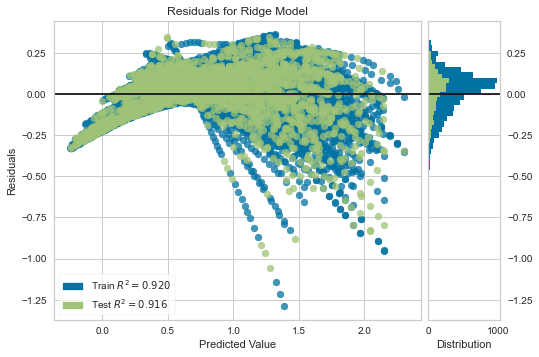

Mean squared error on test set:  0.024012594727304673


In [154]:
y = df['q_ext']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

In [117]:
#q_abs

Best score in CV:  -0.005851534494895228
Best parameters in CV:  {'alpha': 0.05}


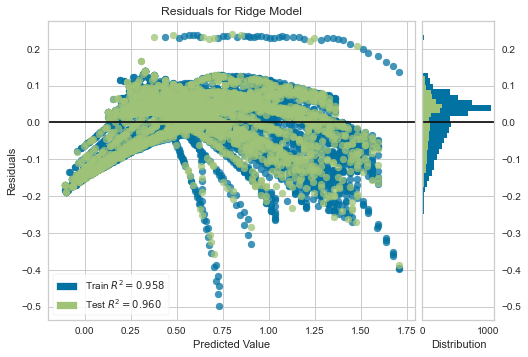

Mean squared error on test set:  0.005569443700541696


In [118]:
y = df['q_abs']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

In [119]:
#q_sca

Best score in CV:  -0.010011350103120629
Best parameters in CV:  {'alpha': 0.5}


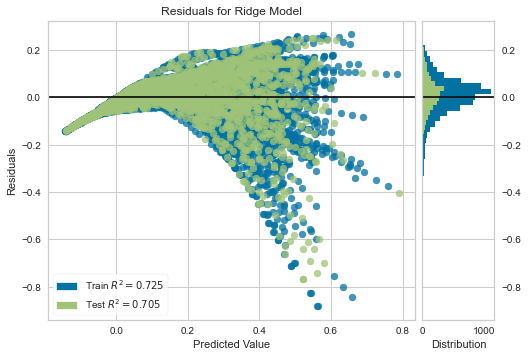

Mean squared error on test set:  0.01097641512708635


In [120]:
y = df['q_sca']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

In [121]:
#g

Best score in CV:  -0.0053718926460648705
Best parameters in CV:  {'alpha': 0.1}


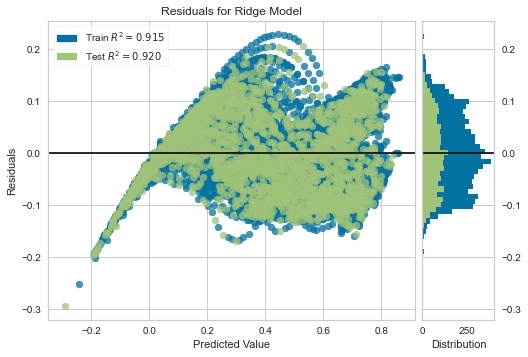

Mean squared error on test set:  0.005174657858548849


In [122]:
y = df['g']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

In [123]:
#c_geo

Best score in CV:  -3447663.2792441375
Best parameters in CV:  {'alpha': 0}


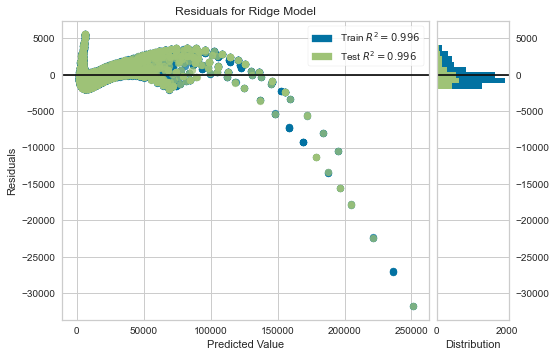

Mean squared error on test set:  3569370.3816072987


In [124]:
y = df['c_geo']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

In [125]:
#c_ext

Best score in CV:  -0.0001995689729377787
Best parameters in CV:  {'alpha': 0.1}


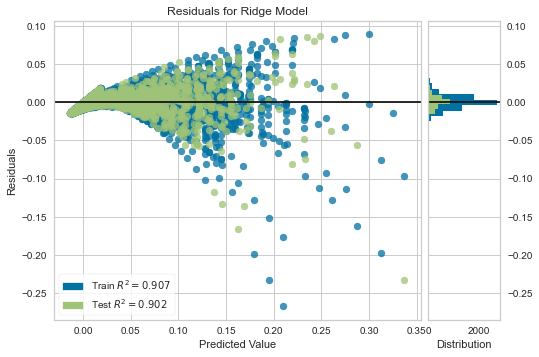

Mean squared error on test set:  0.000200020132569902


In [126]:
y = df['c_ext']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

In [127]:
#c_abs

Best score in CV:  -5.462754199313245e-05
Best parameters in CV:  {'alpha': 0.1}


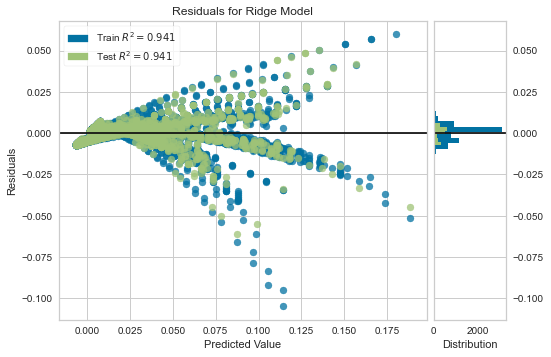

Mean squared error on test set:  5.147111865523736e-05


In [128]:
y = df['c_abs']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

In [129]:
#c_sca

Best score in CV:  -7.435948784340749e-05
Best parameters in CV:  {'alpha': 0.1}


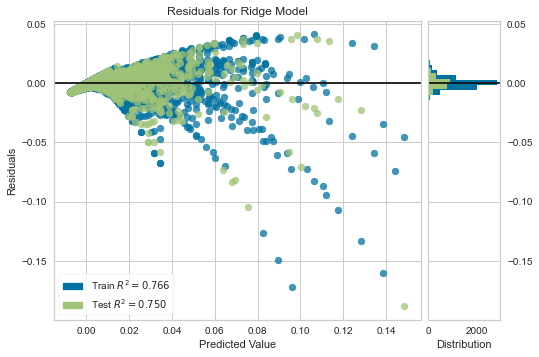

Mean squared error on test set:  7.856509290305232e-05


In [130]:
y = df['c_sca']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

In [131]:
#ssa

Best score in CV:  -0.001868291211400137
Best parameters in CV:  {'alpha': 0}


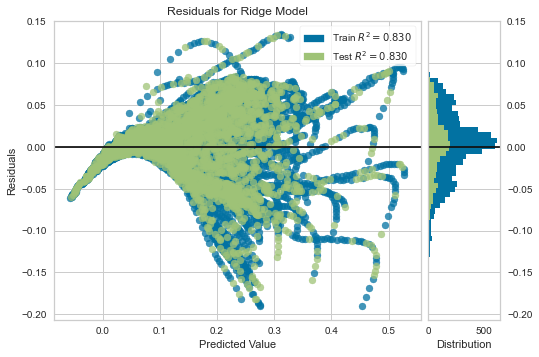

Mean squared error on test set:  0.001965113580794281


In [132]:
y = df['ssa']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

In [133]:
#mac_total

Best score in CV:  -0.09926015036816513
Best parameters in CV:  {'alpha': 0.01}


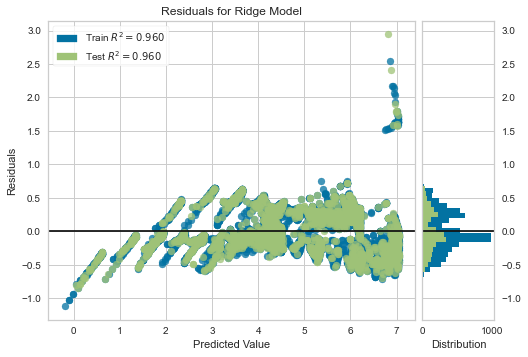

Mean squared error on test set:  0.10044618601504965


In [134]:
y = df['mac_total']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

In [135]:
#mac_bc

Best score in CV:  -1.3205418389973405
Best parameters in CV:  {'alpha': 1}


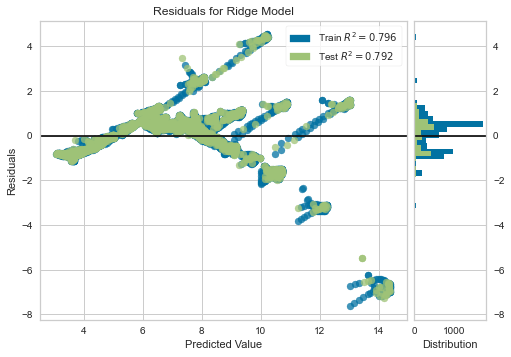

Mean squared error on test set:  1.3615829893080225


In [136]:
y = df['mac_bc']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)

In [137]:
#mac_organics

Best score in CV:  -5156.402093574265
Best parameters in CV:  {'alpha': 0.5}


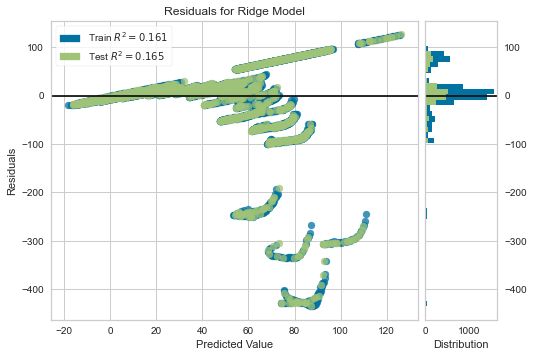

Mean squared error on test set:  5667.150188464709


In [138]:
y = df['mac_organics']
X = df.iloc[:,:8]

array_var=generate_default_ridge_model(X,y)

grid_search=grid_search_cv(parameters, array_var[0], array_var[1], array_var[2])

parameter_alpha=grid_search.best_params_['alpha']

mse=residual_plot_mse(parameter_alpha, array_var[1], array_var[2], array_var[3], array_var[4])
print('Mean squared error on test set: ', mse)